In [1]:
import os
import glob
import tqdm
import json
import argparse
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [90]:
parsed_img_dir = '/home/zyh/speedtalker/mask_basedNeRF/dataset/parsing'
ori_imgs_dir = '/home/zyh/speedtalker/mask_basedNeRF/dataset/ori_imgs'

image_paths = glob.glob(os.path.join(ori_imgs_dir, '*.jpg'))
bg_img = cv2.imread("/home/zyh/AD-NeRF/dataset/Obama/bc.jpg", cv2.IMREAD_UNCHANGED)
print(f'[INFO] ===== extract head images for {ori_imgs_dir} =====')
for image_path in tqdm.tqdm(image_paths):
    #print(image_path)
        # read ori img
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED) # [H, W, 3]
    parsing_img = cv2.imread(image_path.replace('ori_imgs', 'parsing').replace('.jpg', '.png')) #这种写法可以保证ori和parsing是pair
        #print(img.shape)
        #print(parsing_img.shape)
    strong_img = np.zeros((img.shape[0], img.shape[1], 3))#  + np.array([255, 255, 255])  # + 255
    weak_img = np.zeros((img.shape[0], img.shape[1], 3)) + np.array([255, 255, 255])  # + 255
    strong_part = (parsing_img[:, :, 0] == 0) & (parsing_img[:, :, 1] == 0) & (parsing_img[:, :, 2] == 255)
    weak_part = (parsing_img[:, :, 0] == 0) & (parsing_img[:, :, 1] == 225) & (parsing_img[:, :, 2] == 0)
    #print(strong_part)
    #strong_img[strong_part] = img[strong_part]
    #weak_img[weak_part] = img[weak_part]
    strong_img = img.copy()
    weak_img = img.copy()
    strong_img[~strong_part] = bg_img[~strong_part]
    weak_img[~weak_part] = bg_img[~weak_part]
    #print(strong_img)
    cv2.imwrite(image_path.replace('ori_imgs', 'strong_imgs'), strong_img)
    cv2.imwrite(image_path.replace('ori_imgs', 'weak_imgs'), weak_img)
print(f'[INFO] ===== extracted head images =====')


[INFO] ===== extract head images for /home/zyh/speedtalker/mask_basedNeRF/dataset/ori_imgs =====


100%|███████████████████████████████████████████████████████████████| 8000/8000 [03:45<00:00, 35.49it/s]

[INFO] ===== extracted head images =====


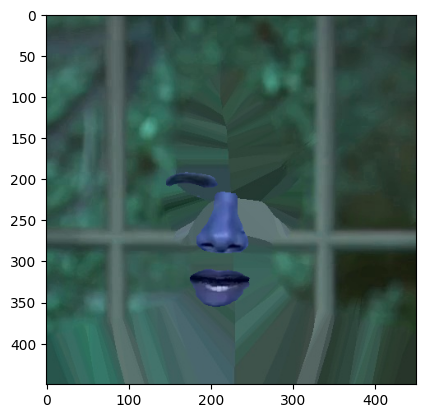

In [88]:
plt.imshow(strong_img)

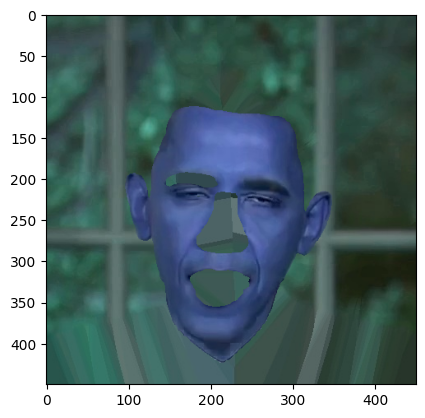

In [89]:
plt.imshow(weak_img)

In [60]:
print(strong_img.sum())
print(weak_img.sum())

1644297.0
132714680.0


### bc.jpg  backgound用于mask填充

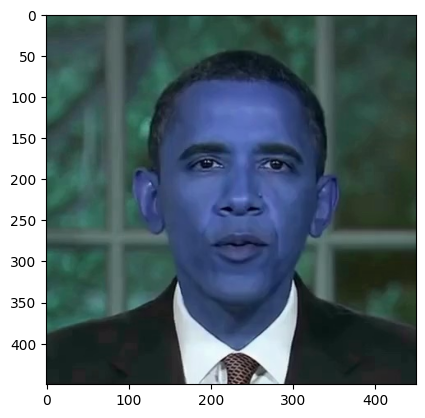

In [14]:
ori_imgs_dir = '/home/zyh/speedtalker/mask_basedNeRF/dataset/ori_imgs/0.jpg'
a = cv2.imread(ori_imgs_dir, cv2.IMREAD_UNCHANGED)
plt.imshow(a)